In [8]:
import numpy as np
import matplotlib.pyplot as plt

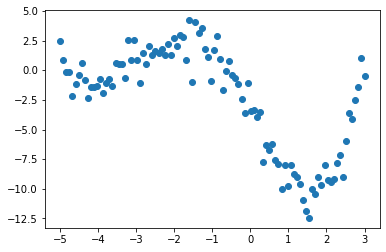

In [18]:
X=np.linspace(-5,3,100)
y=0.1*(X-3)*(X+3)*(X+1)*(X+5)
y+=1*np.random.normal(1,size=100)
plt.scatter(X,y)

In [22]:
data=np.column_stack((X,y))
len(data)

100

## Train-test-split

In [23]:
# 데이터를 무작위로 섞음
np.random.shuffle(data)
# data # 순서 바뀌는것 확인

In [24]:
train=data[:70,:]
test=data[70:,:]

In [25]:
print(train.shape)
print(test.shape)

(70, 2)
(30, 2)


In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

### train 데이터를 이용하여 훈련

In [31]:
X_train=train[:,0].reshape(-1,1)
y_train=train[:,1]
reg.fit(X_train,y_train)

LinearRegression()

### test 데이터를 이용한 검증

In [32]:
X_test=test[:,0].reshape(-1,1)
y_test=test[:,1]
y_pred=reg.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

13.97306712178794

## sklearn을 이용한 train_test_split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[:,0].reshape(-1,1),data[:,1],test_size=0.3,shuffle=True)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 1)
(30, 1)
(70,)
(30,)


In [36]:
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [37]:
mean_squared_error(y_test,y_pred)

11.828210464498344

## 차수를 변경해가며 검증

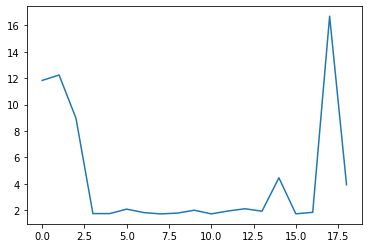

In [38]:
from sklearn.preprocessing import PolynomialFeatures
mse=[]
for i in range(1,20):
    poly=PolynomialFeatures(degree=i,include_bias=False)  # 데이터에 차수 반영
    reg.fit(poly.fit_transform(X_train),y_train)
    y_pred=reg.predict(poly.fit_transform(X_test))
    mse.append(mean_squared_error(y_test,y_pred))
plt.plot(mse)
    

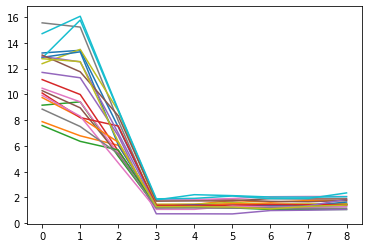

In [39]:
from sklearn.preprocessing import PolynomialFeatures
for s in range(20): # 위 과정 여러번 반복
    mse=[]
    X_train,X_test,y_train,y_test = train_test_split(data[:,0].reshape(-1,1),data[:,1],test_size=0.3,shuffle=True)
    for i in range(1,10):
        poly=PolynomialFeatures(degree=i,include_bias=False)    
        reg.fit(poly.fit_transform(X_train),y_train)
        y_pred=reg.predict(poly.fit_transform(X_test))
        mse.append(mean_squared_error(y_test,y_pred))
    plt.plot(mse)
    

data